<p align="center"><b><br>Tugas Kelompok Naive Bayes</b></br>

**Anggota :**
1. Habibah Ratna Fadhila Islami Hana (2311110038)
2. Agung Malik Ibrahim (2311110067)

**Kelas : SD04-B**

## Dataset

| Column      | Description |
| ----------- | ----------- |
| Tn      | Suhu minimum (°C)       |
| Tx   | Suhu maksimum (°C)        |
| Tavg   | Suhu rata-rata (°C)        |
| RH_avg   | Kelembapan rata-rata (%)       |
| ss   | Lamanya penyinaran matahari (jam)        |
| ff_x   | Kecepatan angin maksimum (m/s)       |
| ddd_x   | Arah angin saat kecepatan maksimum       |
| ff_avg   | Kecepatan angin rata-rata (m/s)       |
| ddd_car   | Arah angin rata-rata        |
| RR   | Curah hujan (Yes/No?)        |


> Reference:
<br>[Sumber 1](https://jsi.stikom-bali.ac.id/index.php/jsi/article/view/603)</br>
[Sumber 2](https://www.ejurnal.stmik-budidarma.ac.id/index.php/mib/article/download/7886/3932)

## Import Library

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## Import Dataset

In [33]:
data = pd.read_excel('/content/Buku3.xlsx')
data

,Tn,Tx,Tavg,RH_avg,ss,ff_x,ddd_x,ff_avg,ddd_car,RR
0,23.8,33.0,28.2,77,0.3,8,280,5,9,1
1,25.0,33.6,28.7,70,7.1,9,270,5,9,1
2,27.4,33.1,29.9,76,10.7,5,20,2,7,0
3,26.2,33.0,29.0,76,9.7,5,300,2,5,1
4,26.6,32.0,28.9,80,7.2,5,350,2,7,1
...,...,...,...,...,...,...,...,...,...,...
869,27.0,32.8,29.6,79,3.5,4,60,1,5,0
870,26.2,32.4,28.4,82,5.4,5,320,2,5,1
871,26.0,31.2,27.9,83,8.1,3,70,1,5,0
872,25.2,31.0,27.8,85,0.2,4,350,1,5,1


## Overview

In [34]:
data.shape

(874, 10)

In [35]:
data.dtypes

,0
Tn,float64
Tx,float64
Tavg,float64
RH_avg,int64
ss,float64
ff_x,int64
ddd_x,int64
ff_avg,int64
ddd_car,int64
RR,int64


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tn       874 non-null    float64
 1   Tx       874 non-null    float64
 2   Tavg     874 non-null    float64
 3   RH_avg   874 non-null    int64  
 4   ss       874 non-null    float64
 5   ff_x     874 non-null    int64  
 6   ddd_x    874 non-null    int64  
 7   ff_avg   874 non-null    int64  
 8   ddd_car  874 non-null    int64  
 9   RR       874 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 68.4 KB


In [37]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Tn,874.0,26.099542,1.060981,20.2,25.4,26.2,26.9,28.7
Tx,874.0,31.982838,1.289717,27.2,31.2,32.2,32.8,35.6
Tavg,874.0,28.569794,0.949711,25.3,28.0,28.7,29.2,31.4
RH_avg,874.0,78.604119,5.683221,60.0,75.0,79.0,82.0,93.0
ss,874.0,5.492563,3.197841,0.0,2.7,6.0,8.3,11.2
ff_x,874.0,5.394737,1.633279,2.0,4.0,5.0,6.0,23.0
ddd_x,874.0,180.685355,122.012668,10.0,60.0,190.0,300.0,360.0
ff_avg,874.0,2.271167,0.864691,0.0,2.0,2.0,3.0,6.0
ddd_car,874.0,5.272311,2.571139,1.0,3.0,5.0,7.0,9.0
RR,874.0,0.518307,0.499951,0.0,0.0,1.0,1.0,1.0


In [38]:
data.isnull().sum()

,0
Tn,0
Tx,0
Tavg,0
RH_avg,0
ss,0
ff_x,0
ddd_x,0
ff_avg,0
ddd_car,0
RR,0


### Insight:
Dapat dilihat dari hasil code-code diatas, dataset dalam kondisi bersih, tidak terdapat null value, tipe data yang perlu diubah, dll. Oleh karena itu, kita tidak perlu melakukan adanya preprocessing.

## Exploratory Data Analysis

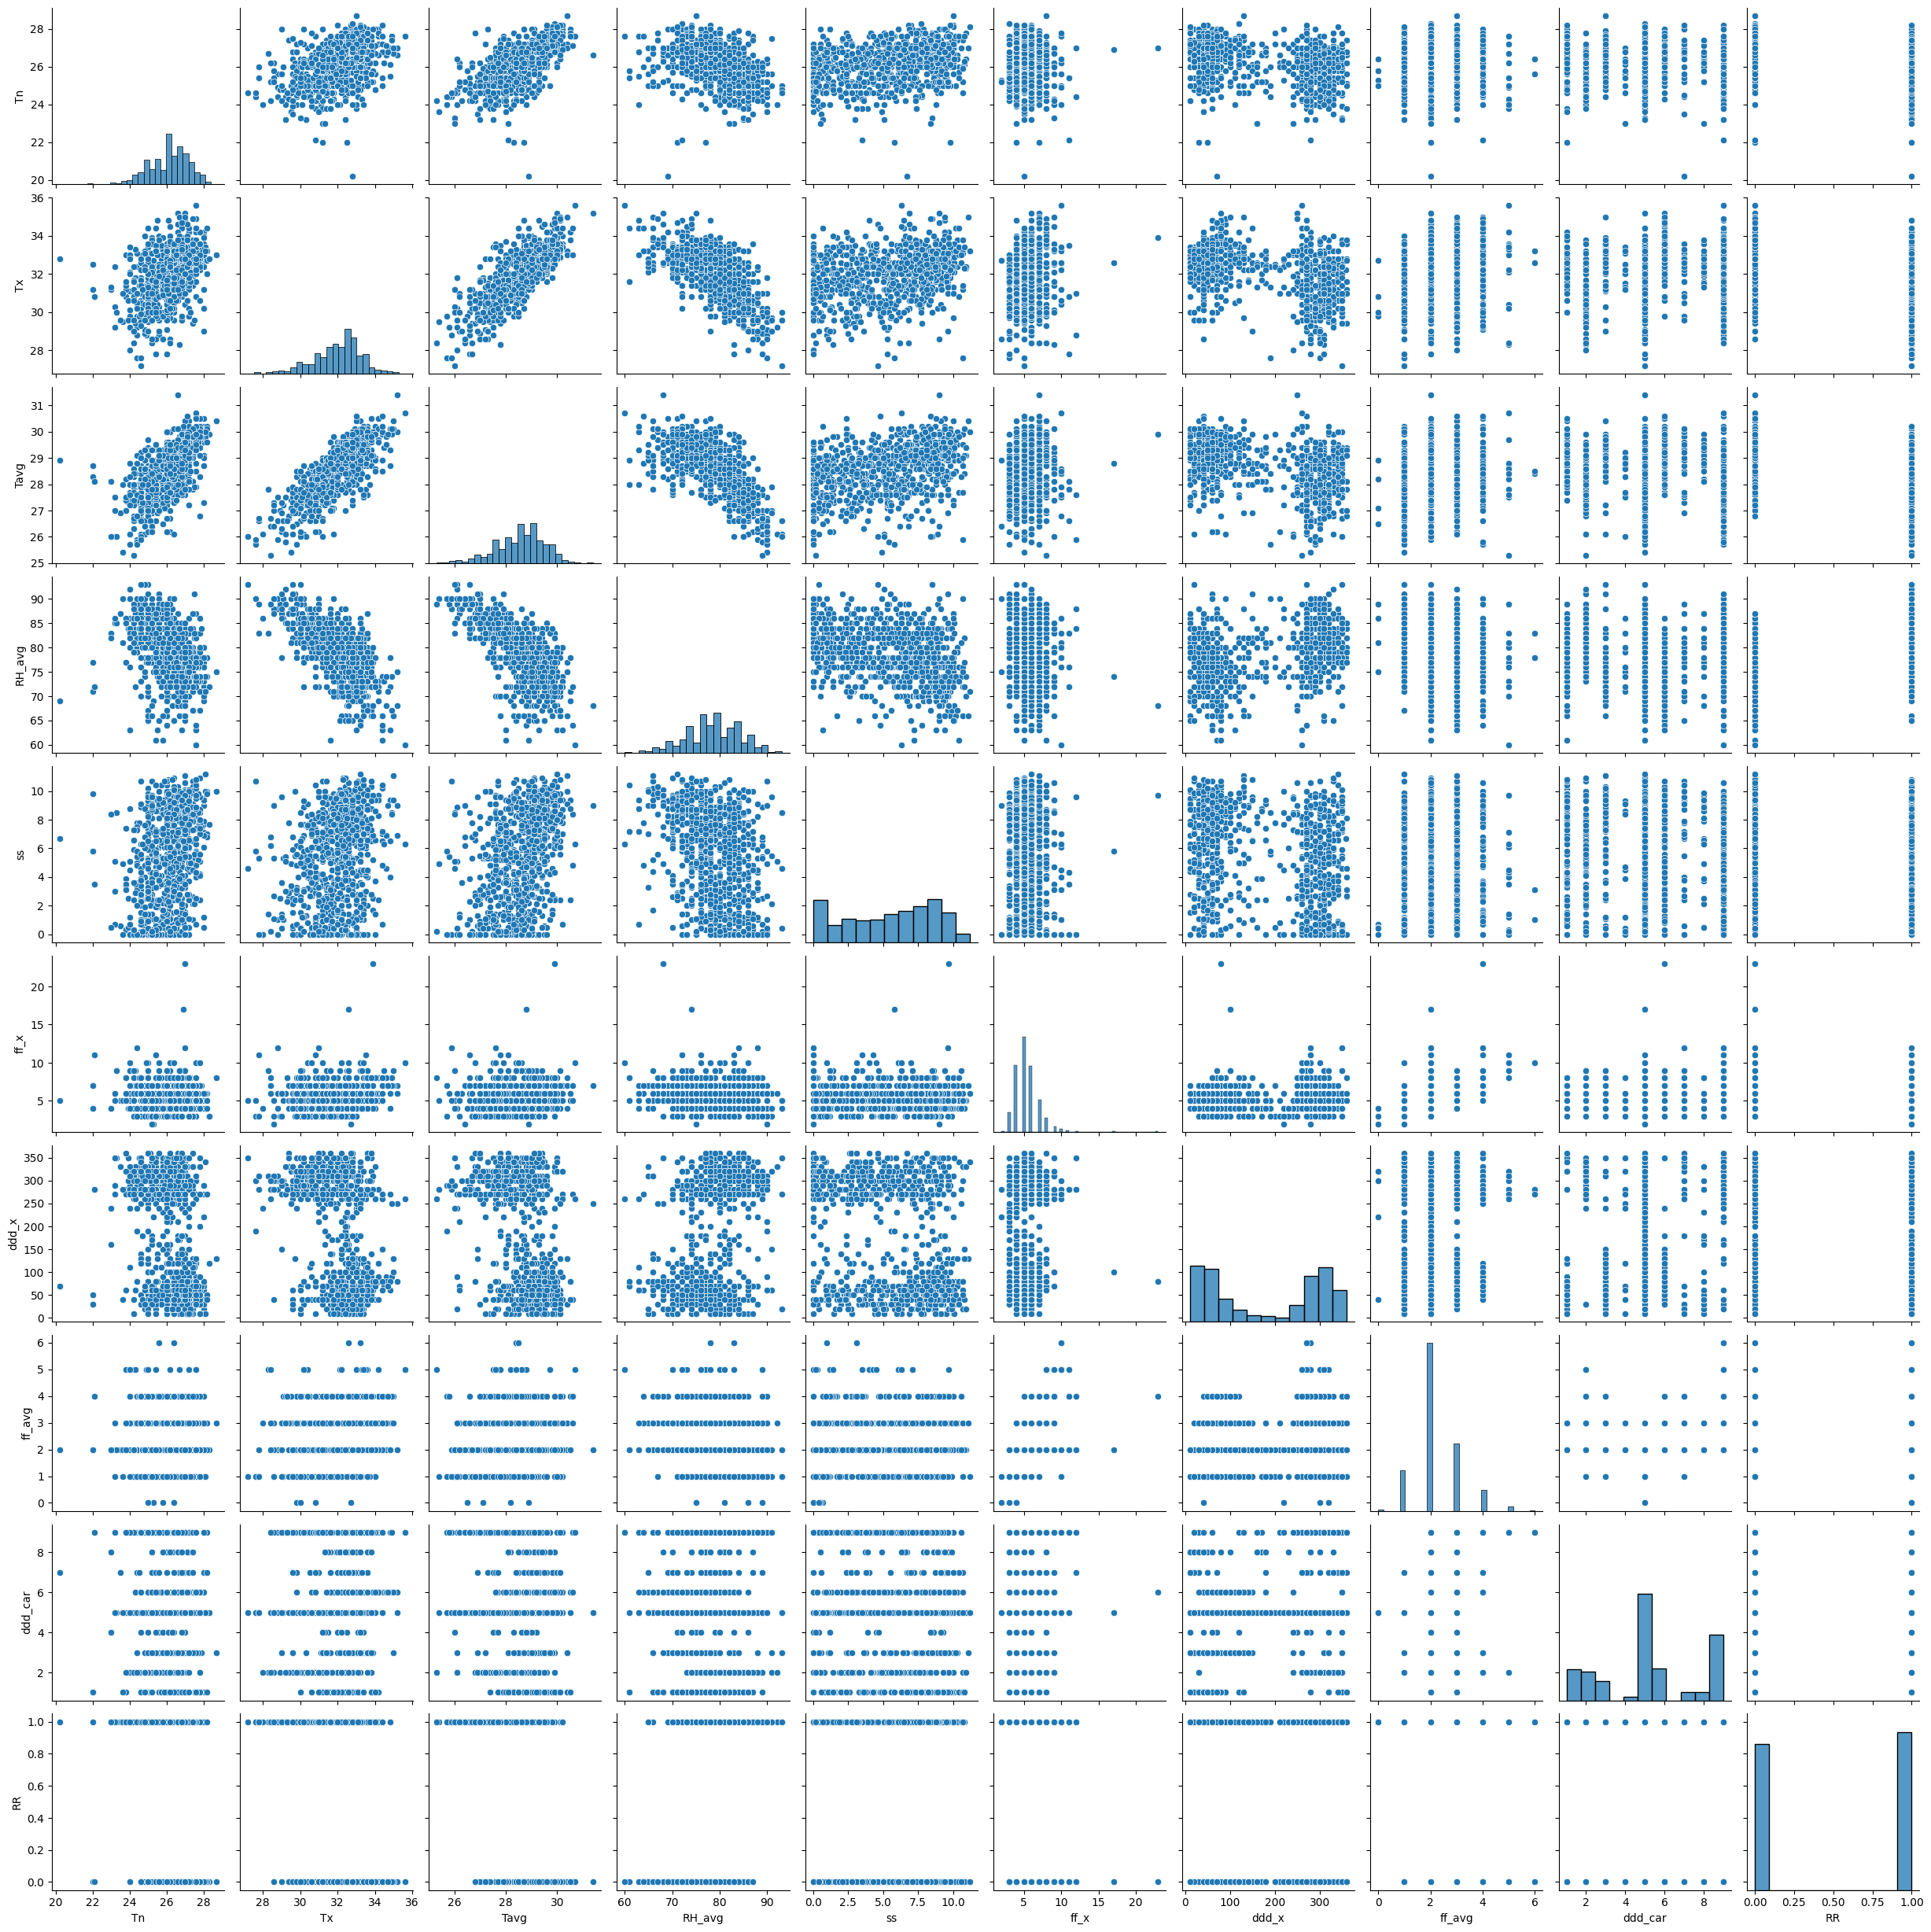

In [ ]:
sns.pairplot(data)

### Insight:
- Terdapat korelasi positif antara minimum temperature (Tn), maximum temperature (Tx), dan average temperature (Tavg). Hal ini dikarenakan suhu rata-rata dihitung berdasarkan suhu minimum dan maksimum, sehingga kenaikan pada salah satu dari `Tn` atau `Tx ` akan berdampak pada peningkatan `Tavg`.

- Kelembapan mempunyai korelasi yang terbalik dengan temperature variable (Tn, Tx, Tavg) yang mengindikasikan semakin tinggi suhu/temperature semakin rendah level kelembapan. Hal ini dikarenakan suhu yang lebih tinggi meningkatkan laju penguapan air, sehingga mengurangi kelembaban relatif di udara.


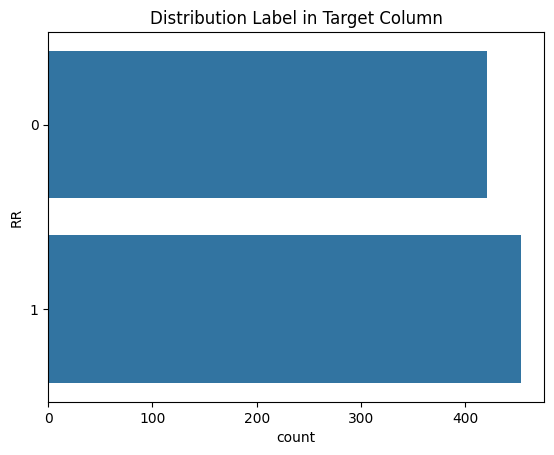

In [ ]:
sns.countplot(data=data, y='RR')
plt.title("Distribution Label in Target Column")
plt.show()

### Insight:
Dataset memiliki distribusi yang relatif seimbang antara kelas hujan (1) dan tidak hujan (0). Distribusi yang seimbang ini menunjukkan bahwa tidak ada bias yang signifikan dalam dataset, sehingga model prediksi yang dibangun nantinya tidak terlalu condong ke salah satu kelas.

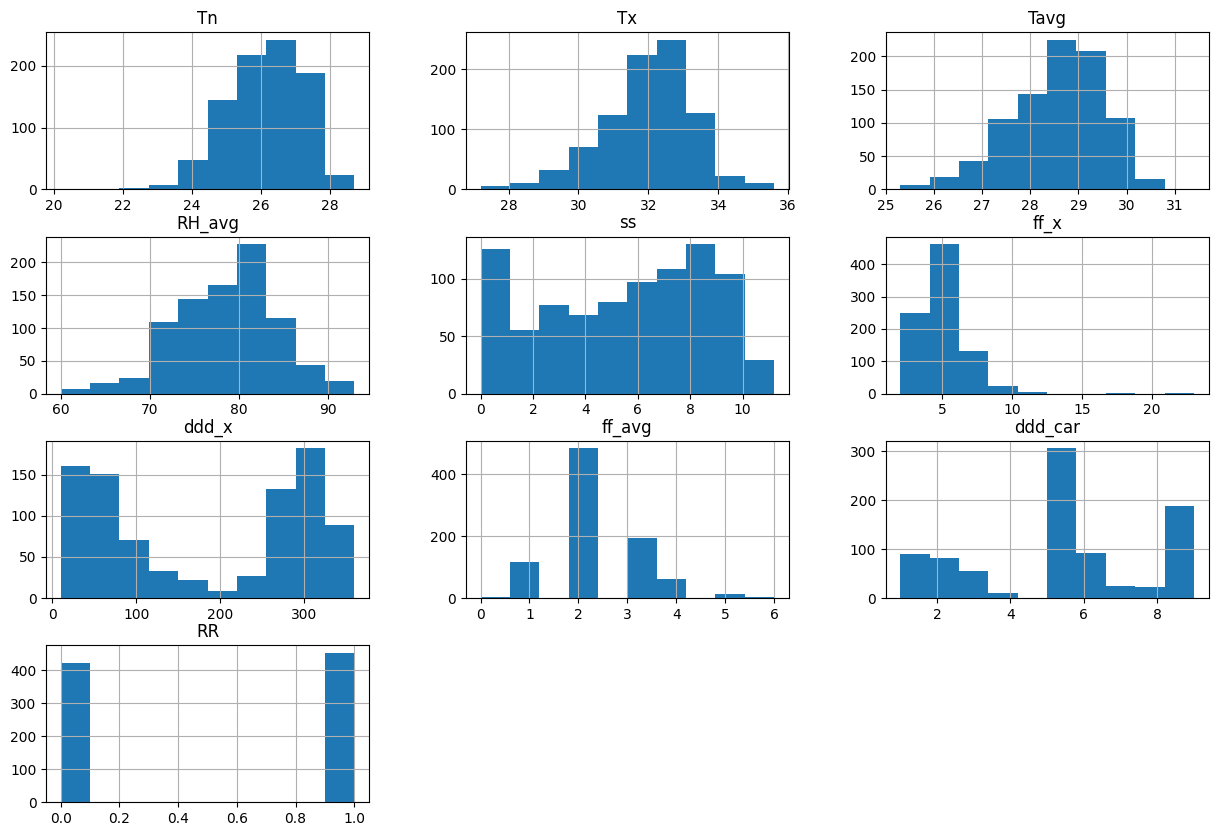

In [ ]:
def plot_histograms(data):
    data.hist(bins=10, figsize=(15,10), layout=(4,3))
    plt.show()

plot_histograms(data)

### Insight:

- Dari histogram tersebut dapat dilihat bahwa beberapa fitur menunjukkaan distribusi yang mendekati normal seperti `Tn` (suhu minimum), `Tx` (suhu maksimum), dan `Tavg` (suhu rata-rata). Hal ini menunjukkan bahwa suhu tidak mengalami perubahan yang terlalu drastis.

- Variabel `RH avg` (kelembapan rata-rata) menunjukkan distribusi yang cukup simetris. Hal ini menunjukkan bahwa kelembapan cenderung stabil dan tidak memiliki kecenderungan ekstrem ke satu sisi (terlalu kering atau terlalu lembap). Dapat diketahui pula, kelembapan rata-rata merupakan faktor yang cukup konsisten dalam memengaruhi curah hujan, karena nilainya tidak menyimpang terlalu banyak dari rata-rata.

- Fitur `ff_x` (kecepatan angin) dan `ddd_x` (arah angin) menunjukkan pola distribusi yang tidak simetris atau skewed. Hal ini menunjukkan bahwa ada perbedaan yang signifikan dalam frekuensi kecepatan dan arah angin tertentu. Sehingga dapat berpengaruh pada prediksi cuaca.

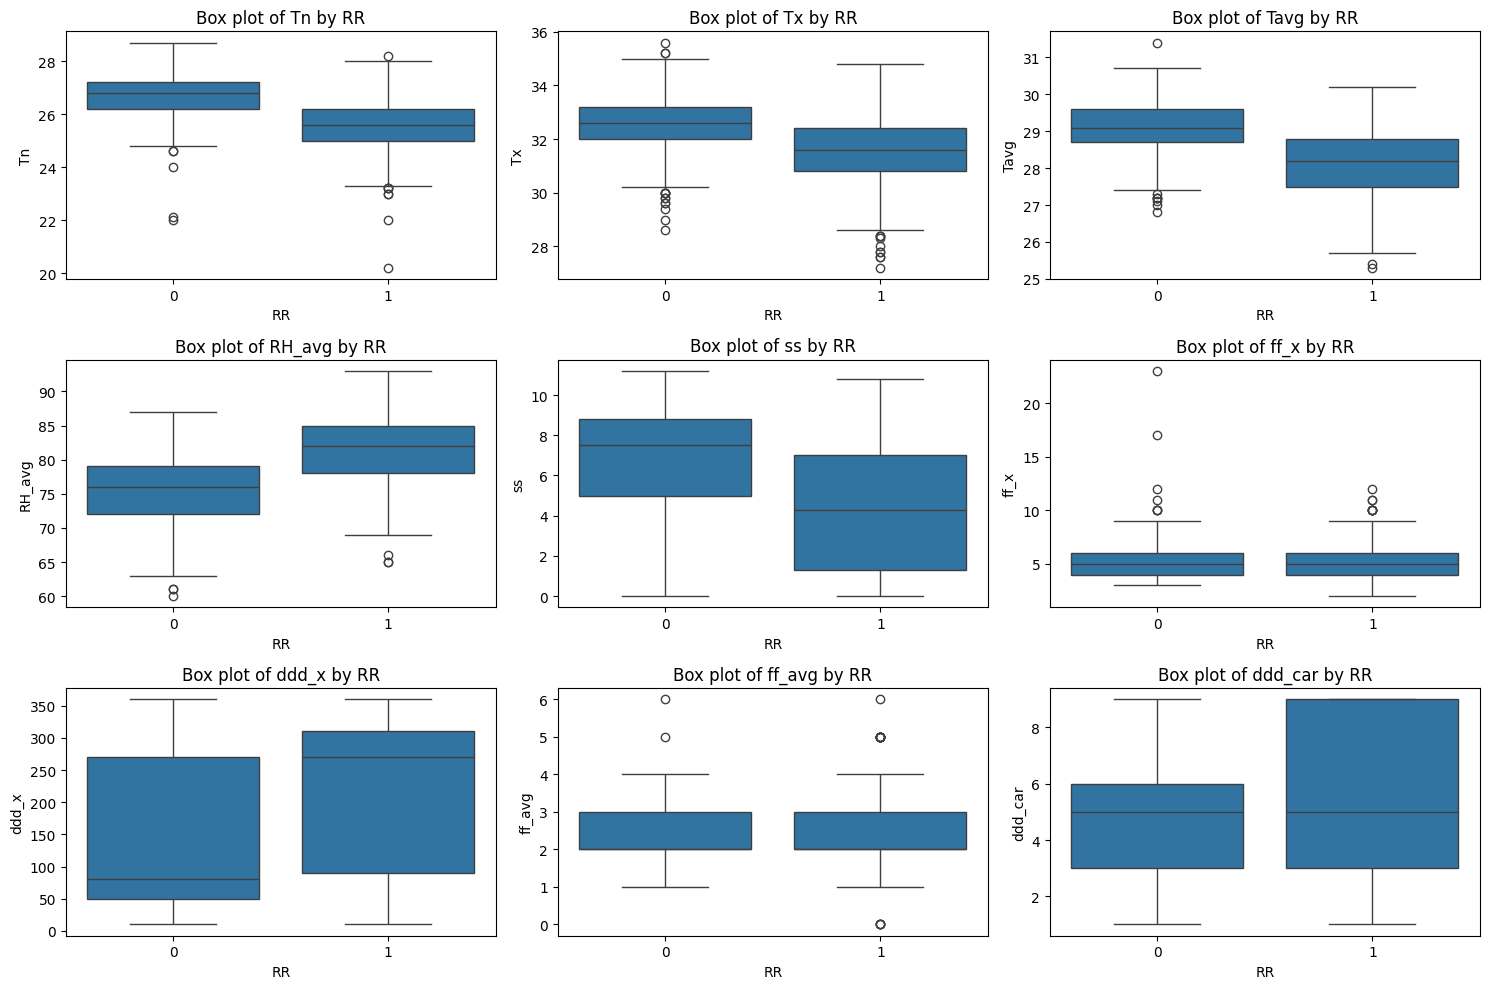

In [ ]:
def plot_boxplot(data):
    plt.figure(figsize=(15,10))
    for i, column in enumerate(data.columns[:-1]):
        plt.subplot(3, 3, i + 1)
        sns.boxplot(x='RR', y=column, data=data)
        plt.title(f"Box plot of {column} by RR")
    plt.tight_layout()
    plt.show()

plot_boxplot(data)

### Insight:

- `Tn`, `Tx`, dan `Tavg` (temperatur) vs `RR`
  - Suhu minimum (Tn), maksimum (Tx), dan rata-rata (Tavg) cenderung lebih rendah saat RR = 1 (hujan) dibandingkan saat RR = 0 (tidak hujan).
  - Hal ini menunjukkan bahwa curah hujan cenderung terjadi pada suhu yang lebih rendah.

- `RH_avg` (kelembapan) vs `RR`
  - Kelembaban rata-rata (RH_avg) lebih tinggi saat hujan (RR = 1) dibandingkan saat tidak hujan.
  - Hal ini terjadi karena kelembaban meningkat ketika terjadi hujan.

- `ss` (penyinaran matahari) vs `RR`
  - Penyinaran matahari (ss) berkurang saat hujan (RR = 1).
  - Hal ini terjadi karena saat hujan, lebih banyak awan menutupi matahari.

- `ff_x` dan `ff_avg` (kecepatan angin) vs `RR`
  - Tidak ada perbedaan signifikan dalam kecepatan angin maksimum (ff_x) dan rata-rata (ff_avg) antara kondisi hujan dan tidak hujan.
  - Terdapat beberapa outlier dengan kecepatan angin yang lebih tinggi, terutama pada kondisi tidak hujan.

- `ddd_x` dan `ddd_car` (arah angin) vs `RR`
  - Arah angin maksimum (ddd_x) menunjukkan variasi yang lebih besar saat hujan.
  - Hal ini mengindikasikan bahwa arah angin lebih berubah-ubah saat terjadi curah hujan.

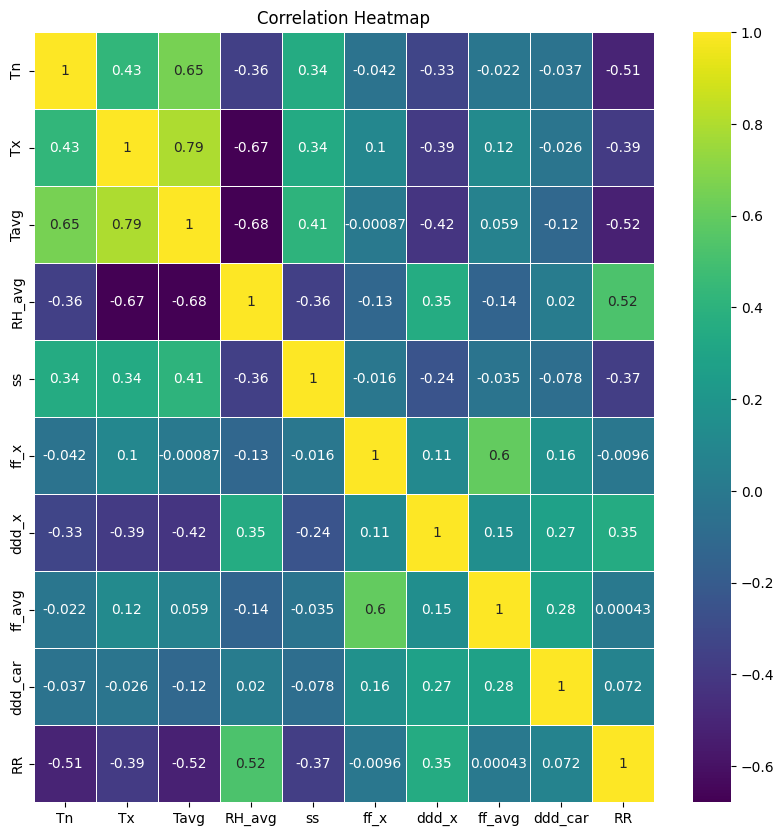

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr() , annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Insight:

| Variabel                      | Pengaruh terhadap Curah Hujan (RR) |
|------------------------------|-------------------------------------|
| Kelembaban (RH_avg)          | Korelasi positif tinggi (+0.52). Semakin tinggi kelembaban, semakin besar kemungkinan hujan karena udara jenuh lebih cepat mengembun menjadi hujan. |
| Suhu Rata-rata (Tavg)        | Korelasi negatif sedang (-0.52). Semakin tinggi suhu rata-rata, semakin kecil kemungkinan hujan, hal ini dikarenakan penguapan yang lebih cepat dan udara yang lebih kering. |
| Suhu Minimum (Tn)            | Korelasi negatif cukup tinggi (-0.51). Suhu minimum yang lebih rendah cenderung berhubungan dengan kelembaban tinggi dan peningkatan kemungkinan hujan. |
| Suhu Maksimum (Tx)           | Korelasi negatif sedang (-0.39). Suhu maksimum yang lebih tinggi cenderung mengurangi curah hujan. |
| Penyinaran Matahari (ss)     | Korelasi negatif (-0.37). Semakin tinggi penyinaran matahari, semakin kecil kemungkinan hujan karena sinar matahari mengurangi kelembaban udara. |
| Kecepatan Angin (ff_x)       | Korelasi sangat rendah (-0.0096). Kecepatan angin memengaruhi distribusi uap air, tetapi tidak terlalu berpengaruh terhadap curah hujan. |
| Arah Angin (ddd_x)           | Korelasi positif sedang (+0.35). Arah angin tertentu membawa massa udara lembap yang dapat meningkatkan kemungkinan hujan. |



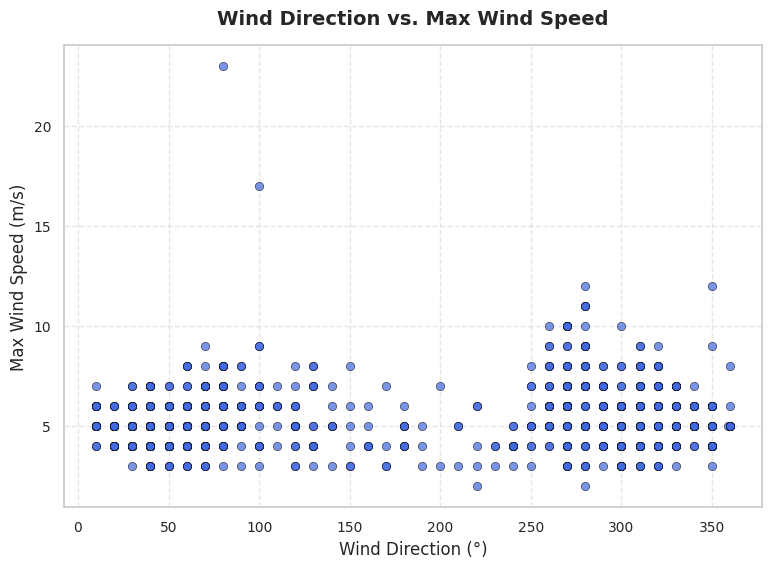

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(9, 6))

sns.scatterplot(
    x=data["ddd_x"], y=data["ff_x"],
    color="royalblue", edgecolor="black", alpha=0.7
)

plt.title("Wind Direction vs. Max Wind Speed", fontsize=14, fontweight="bold", pad=15)
plt.xlabel("Wind Direction (°)", fontsize=12)
plt.ylabel("Max Wind Speed (m/s)", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

## Modelling

In [39]:
X = data.drop('RR', axis=1)
y = data['RR']

In [40]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scikit-learn Library

In [42]:
model = GaussianNB()

y_pred = model.fit(X_train, y_train).predict(X_test)

### Scratch

In [43]:
class NaiveBayes:
    def fit(self, X, y):
        X = np.asarray(X, dtype=np.float64)
        y = np.asarray(y)

        self.m, self.n = X.shape
        self.unique_classes = np.unique(y)
        self.n_unique = len(self.unique_classes)

        self.mean = np.zeros((self.n_unique, self.n))
        self.variance = np.zeros((self.n_unique, self.n))
        self.priors = np.zeros(self.n_unique)

        for i, c in enumerate(self.unique_classes):
            X_c = X[y == c]
            self.mean[i, :] = np.mean(X_c, axis=0)
            self.variance[i, :] = np.var(X_c, axis=0)
            self.priors[i] = X_c.shape[0] / self.m

    def gaussian_density(self, x, c):
        mean = self.mean[c, :]
        variance = self.variance[c, :]

        const = 1 / np.sqrt(variance * 2 * np.pi)
        proba = np.exp(-0.5 * ((x - mean) ** 2 / variance))
        return const * proba

    def get_probability(self, x):
        posteriors = []

        for i, c in enumerate(self.unique_classes):
            prior = np.log(self.priors[i])
            posterior = np.sum(np.log(self.gaussian_density(x, i)))
            posterior += prior
            posteriors.append(posterior)

        return self.unique_classes[np.argmax(posteriors)]

    def predict(self, X):
        X = np.asarray(X, dtype=np.float64)
        predictions = [self.get_probability(x) for x in X]
        return np.array(predictions)

In [44]:
model = NaiveBayes()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

## Evaluation

### Scikit-learn

In [45]:
f1 = f1_score(y_test, y_pred, average="binary")
accuracy = accuracy_score(y_test, y_pred)

print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

F1 Score: 0.8098159509202454
Accuracy: 0.8296703296703297


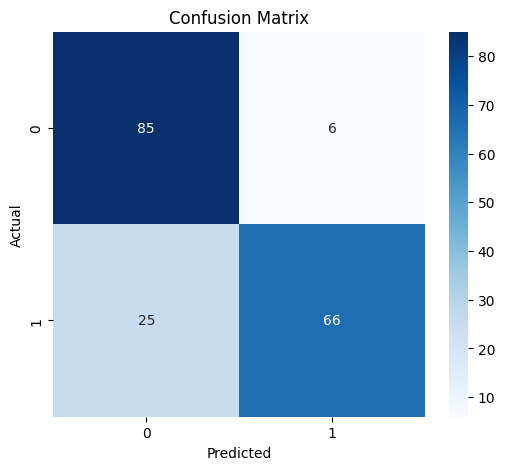

In [46]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.85        91
           1       0.92      0.73      0.81        91

    accuracy                           0.83       182
   macro avg       0.84      0.83      0.83       182
weighted avg       0.84      0.83      0.83       182



### Scratch

In [48]:
def accuracy(y_true, y_pred):
    total_samples = len(y_true)
    correct_predictions = np.sum(y_true == y_pred)
    return (correct_predictions / total_samples)

In [49]:
def f1_metric(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1

In [50]:
f1_scratch = f1_metric(y_test, y_pred)
acc = accuracy(y_test, predictions)

print(f"F1 Score: {f1_scratch}")
print(f"Accuracy: {acc}")

F1 Score: 0.8098159509202454
Accuracy: 0.8296703296703297
